In [63]:
import pandas
import configparser
import psycopg2

In [64]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [65]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [66]:
sql = "select * from student"

In [67]:
df = pandas.read_sql_query(sql,conn)

df [:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT


In [68]:
sql = """ 
select professor.p_name,course.c_name
from professor 
inner join course
on professor.p_email = course.p_email

"""

In [69]:
df = pandas.read_sql_query(sql,conn)

df[:]

,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


In [70]:
sql = """ 
select count(*) as num_stu,c_number
from enroll
group by c_number

"""

<AxesSubplot:xlabel='c_number'>

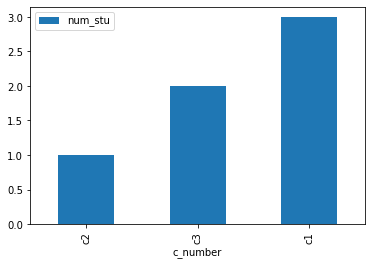

In [71]:
df = pandas.read_sql_query(sql,conn)

df.plot.bar(x='c_number',y='num_stu')

In [72]:
sql = """
select professor.p_name,count(*) as teach_num
from professor 
inner join course 
on professor.p_email = course.p_email
group by professor.p_name
"""

<AxesSubplot:xlabel='p_name'>

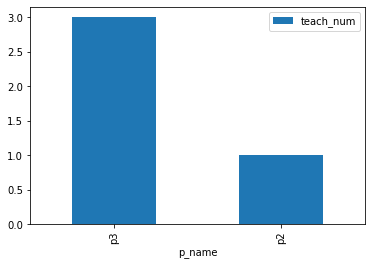

In [73]:
df = pandas.read_sql_query(sql,conn)

df.plot.bar(x='p_name',y='teach_num')

In [74]:
sql = """
insert into student (s_email,s_name,major)
values('{}','{}','{}')
""".format('s5@jmu.edu','s5','GS')

print(sql)


insert into student (s_email,s_name,major)
values('s5@jmu.edu','s5','GS')



In [75]:
cur=conn.cursor()

In [76]:
cur.execute(sql)

In [77]:
conn.commit()

In [78]:
df = pandas.read_sql_query('select * from student',conn)

df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,GS


In [79]:
sql = """
insert into professor (p_email,p_name,p_office)
values('{}','{}','{}')
""".format('p4@jmu.edu','p4','o4')

print(sql)


insert into professor (p_email,p_name,p_office)
values('p4@jmu.edu','p4','o4')



In [80]:
cur=conn.cursor()

In [81]:
cur.execute(sql)

In [82]:
df=pandas.read_sql_query('select * from student',conn)

df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,GS


In [96]:
conn.rollback()

In [97]:
sql = """ 
insert into professor (p_name,p_office,p_email)
values('{}','{}','{}')
""".format('p4','o4','p4@jmu.edu')

In [98]:
cur.execute(sql)

In [99]:
conn.commit()

In [101]:
df = pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,p_office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [102]:
sql = """ 
insert into course (c_number,c_name,room,p_email)
values('{}','{}','{}','{}')
""".format('c5','linkedin','r2','p4@jmu.edu')

In [103]:
cur.execute(sql)

In [104]:
conn.commit()

In [113]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [114]:
sql = """ 
update course
set p_email='{}'
where p_email = '{}'
""".format('p4@jmu.edu','p2@jmu.edu')

In [115]:
cur.execute(sql)

In [116]:
conn.rollback()

In [117]:
conn.commit()

In [118]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [119]:
sql = """ 
delete from professor
where p_email='{}'
""".format('p2@jmu.edu')

In [120]:
cur.execute(sql)

In [121]:
conn.commit

<function connection.commit>

In [122]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [123]:
cur.close()
conn.close()